# T Tests on Independent Samples

The **T Test** (also called **Student’s T Test**) compares two averages (means | $\mu$) and tells us if they are different from each other. The t test also tells us how **significant** the differences are. In other words it lets us know if those differences could have occurred by chance.

A drug company may want to test a new cancer drug to find out if it improves life expectancy. In an experiment, there’s always a control group (a group who are given a placebo). The control group may see an average increased life expectancy of 5 years, while the group taking the new drug might witness an average increase in life expectancy of 6 years. This might indicate that the drug is effective, however that could be down to unique attributes in the sample. To test the efficacy of the drug for the entire population, researchers would have to use a Student’s t test to find out if the results are statistically significant over the whole population.


### T score
The **T score** or **T value** is a **ratio** between the **difference between two groups** and the **difference within the two groups**.

- **large** t-score $\implies$ groups are **different**.
- **small** t-score $\implies$ groups are **similar**.
    
When we run a t test, the bigger the t value, the more likely it is that the results will be reproducable across the population. That raises the question **how big is big enough?** Every t-value has a **p-value** to go with it. A p-value is the **probability** that the results from your sample data occurred by chance. P-values range from 0% to 100%. a p value of 5% is 0.05. Low p-values are good; They indicate that our data did not occur by chance. A p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean that the data is valid. This threshold (0.05 or 0.1) is called the **significance level** and is denoted by $\alpha$. $\alpha$ can be 0.05 or 0.1.

### T Test variations

There are three variations of the t-test:

- An **Independent samples** t-test compares the means for two groups.
- A **Paired sample** t-test compares means from the same group at different times (say, one year apart).
- A **One sample** t-test compares the mean of a single group against a known mean.

## Independent Samples T Test

The **Independent samples** t-test helps us to compare the means of two sets of data. We could run a t test to see if the average math test scores of males and females are different and the Independent Samples T Test helps answer whether these differences could have occurred by random chance.

### Loading libraries and dataset

In [1]:
import os
import csv
import math
import time
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations
from prettytable import PrettyTable

C:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = os.getcwd() + "\\data"
start = time.time()
csvFile = path + "\\NMttest.csv"
with open(csvFile) as fp:
    reader = csv.DictReader(fp)
    data = {}
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]
    for key, value in data.items():
        data[key] = list(filter(None, data[key]))
        data[key] = list(map(lambda x: float(x), data[key]))
    #print("Time to read file ->", round(time.time() - start, 3), "seconds.\n")
    t = PrettyTable(data.keys())
    df = pd.DataFrame.from_dict(data, orient='index').transpose()
    for index, row in df.iterrows():
        t.add_row(row)
    print(t)

+--------------+--------------+--------------+--------------+--------------+
| shiftClass21 | shiftClass22 | shiftClass23 | shiftClass31 | shiftClass32 |
+--------------+--------------+--------------+--------------+--------------+
|   524.996    |   653.745    |   590.035    |   109.126    |   487.797    |
|   587.324    |   346.847    |   506.485    |   446.973    |   697.996    |
|   630.496    |   516.717    |   375.336    |    79.898    |   511.413    |
|   539.347    |   332.523    |   586.754    |   542.809    |   517.957    |
|   500.332    |   532.259    |   580.948    |   531.114    |   379.899    |
|   283.492    |   541.533    |   539.804    |   597.148    |   601.309    |
|   372.994    |    600.35    |   554.802    |   180.683    |   644.818    |
|   552.625    |   578.415    |   474.639    |   680.899    |   541.401    |
|   534.994    |    434.3     |   406.568    |   124.991    |   585.346    |
|   499.706    |   532.291    |   398.284    |   633.796    |   542.259    |

This is a dataset of {{len(data.keys())}} independent numeric variables. They indicate the number of packages manufactured by each manufacturing shift for different number of days. So, `shiftClass31` indicates the number of packages produced by the morning shift on line 3. Each sample has a different number of entries and that is taken into account while performing the t-test.

### Finding pairwise combinations for 2 sample t-tests

The t-test can only be performed on 2 samples at a time. Since we are looking for the **significance relationship** between any pair of shifts, we will perform the t-test on each possible combination of the shifts. A combination is a selection of items from a collection, such that the order of selection does not matter. We can find a $k$-combination of a set $S$ as a subset of $k$ distinct elements of $S$. If the set has $n$ elements, the number of $k$-combinations is equal to $$\frac{n!}{k!(n-k)!}$$
<br>
In the case of a t-test, that resolves to $$\frac{p!}{2*(p-2)!}$$
<br>
where
<br>
$p =$ **Number of parameters**. In this case $p =$ {{len(data.keys())}}. Therefore, we can get the number of possible combinations as - $$\frac{5!}{2*(5-2)!} = 10$$

In [3]:
featureCombos = (list(combinations(data.keys(),2)))
t2 = PrettyTable(['sample1', 'sample2'])
for elem in featureCombos:
    t2.add_row(elem)
print(t2)

+--------------+--------------+
|   sample1    |   sample2    |
+--------------+--------------+
| shiftClass21 | shiftClass22 |
| shiftClass21 | shiftClass23 |
| shiftClass21 | shiftClass31 |
| shiftClass21 | shiftClass32 |
| shiftClass22 | shiftClass23 |
| shiftClass22 | shiftClass31 |
| shiftClass22 | shiftClass32 |
| shiftClass23 | shiftClass31 |
| shiftClass23 | shiftClass32 |
| shiftClass31 | shiftClass32 |
+--------------+--------------+


As we can see above, we have found the {{len(featureCombos)}} different combinations between the features/parameters. We can now proceed on to performing the t-test between the 2 samples and evaluating if they have a **significance relationship**.

### Visualizing the data

Let us visualize one of these pairs of data say `{{featureCombos[2][0]}}` and `{{featureCombos[2][1]}}`

In [4]:
sn.set_style("ticks")
df[['shiftClass31','shiftClass21']].head()

,shiftClass31,shiftClass21
0,109.126,524.996
1,446.973,587.324
2,79.898,630.496
3,542.809,539.347
4,531.114,500.332


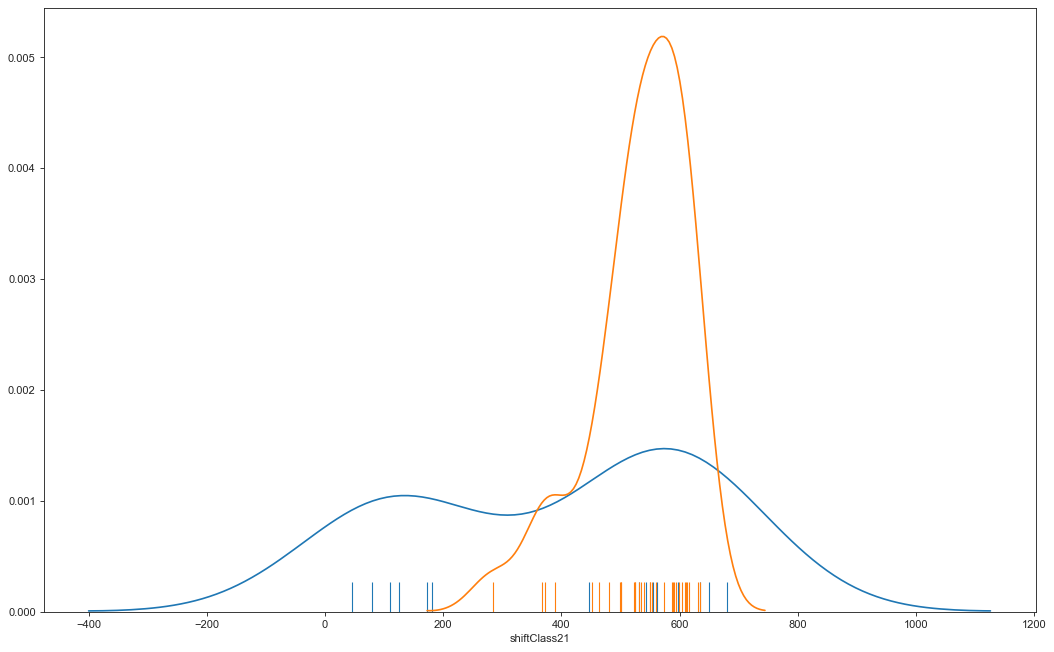

In [5]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
sn.distplot(df['shiftClass31'].dropna(), hist=False, rug=True)
sn.distplot(df['shiftClass21'].dropna(), hist=False, rug=True)
plt.show()

This is a kernel density plot between `{{featureCombos[2][0]}}` and `{{featureCombos[2][1]}}`. Taking a look at the plot, it seems that the two variables have very different value ranges.

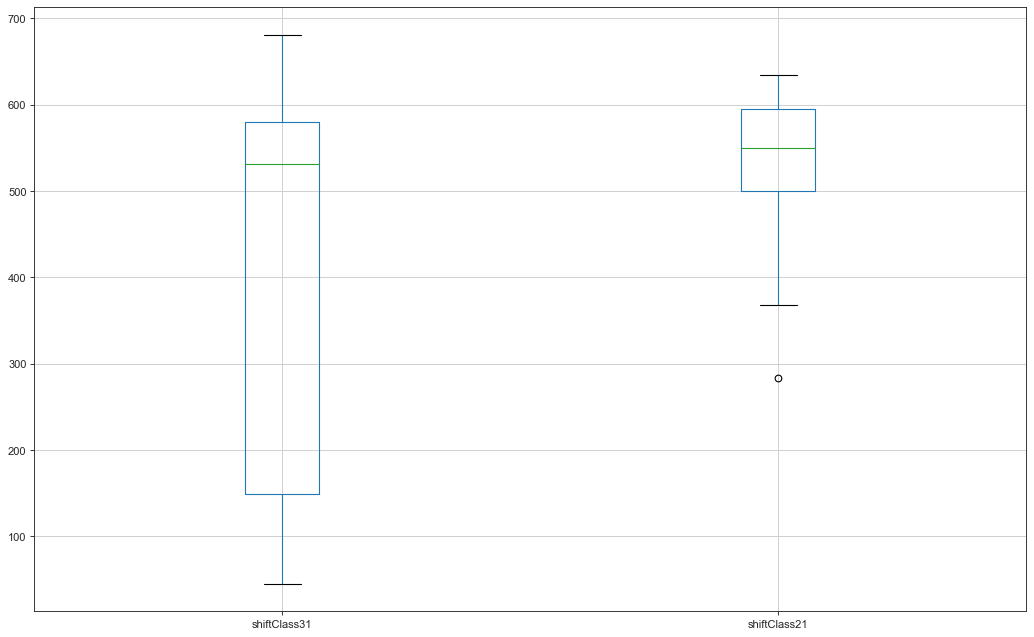

In [6]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
df.boxplot(column=['shiftClass31', 'shiftClass21'])
plt.show()

In [7]:
if 'shiftClass21' in df.columns:
    print(df[['shiftClass21']])

    shiftClass21
0        524.996
1        587.324
2        630.496
3        539.347
4        500.332
5        283.492
6        372.994
7        552.625
8        534.994
9        499.706
10       550.000
11       550.540
12       389.700
13       525.348
14       522.163
15       500.198
16       531.916
17       603.464
18       633.839
19       611.398
20       609.480
21       560.425
22       594.814
23       590.739
24       451.523
25       463.642
26       367.655
27       598.855
28       612.087
29       574.496
30       616.495
31       479.926
32       588.892
33           NaN
34           NaN
35           NaN
36           NaN


### Calculating the T - Value

Let us consider the numerical vectors `{{featureCombos[2][0]}}` and `{{featureCombos[2][1]}}`. We can calculate the T-Value for this pair in the following way.

#### Step 1. Sum the two groups

Let - <br>$A = $ `{{featureCombos[2][1]}}`<br> $B = $ `{{featureCombos[2][0]}}`

$$sum(A) = \sum_{i=1}^{N_A} A $$

$$sum(B) = \sum_{i=1}^{N_B} B $$

In [8]:
A = featureCombos[2][1]
B = featureCombos[2][0]
sumA = sum(df[[A]].dropna().values)[0]
sumB = sum(df[[B]].dropna().values)[0]
print("sum(A)\t:\t", sumA)
print("sum(B)\t:\t", sumB)

sum(A)	:	 5912.932999999999
sum(B)	:	 17553.900999999994


#### Step 2. Square the sums of the two groups

$$sumSq(A) = (\sum_{i=1}^{N_A} A)^2 $$

$$sumSq(B) = (\sum_{i=1}^{N_B} B)^2 $$

In [9]:
sumAsq = sumA ** 2
sumBsq = sumB ** 2
print("sumSq(A)\t:\t", sumAsq)
print("sumSq(B)\t:\t", sumBsq)

sumSq(A)	:	 34962776.66248899
sumSq(B)	:	 308139440.3178008


#### Step 3. Calculate the means of the two groups

$$\mu(A) = \dfrac {\sum ^{N_A}_{i=1}A}{N_A} $$

$$\mu(B) = \dfrac {\sum ^{N_B}_{i=1}B}{N_B} $$

In [10]:
avgA = sumA/len(df[[A]].dropna().values)
avgB = sumB/len(df[[B]].dropna().values)
print("mean(A)\t:\t", avgA)
print("mean(B)\t:\t", avgB)

mean(A)	:	 394.1955333333333
mean(B)	:	 531.9363939393937


#### Step 4. Sum the squares of each instance

$$ssq(A) = \sum_{i=1}^{N_A} A_{i}^2 $$

$$ssq(B) = \sum_{i=1}^{N_B} B_{i}^2 $$

In [11]:
ssqA = sum(map(lambda x: x ** 2, df[[A]].dropna().values))
ssqB = sum(map(lambda x: x ** 2, df[[B]].dropna().values))
print("ssq(A)\t:\t", ssqA[0])
print("ssq(B)\t:\t", ssqB[0])

ssq(A)	:	 3143360.3548949994
ssq(B)	:	 9561937.775227001


#### Step 4. Find the Degrees of Freedom

$$DF = N_A + N_B - 2$$

In [12]:
degreesFreedom = len(df[[A]].dropna().values) + len(df[[B]].dropna().values) - 2
print("Degrees of Freedom\t:\t", degreesFreedom)

Degrees of Freedom	:	 46


#### Step 5. Plug in the pre-calculated values to find the T-Value

$$ t = \dfrac{\mu_A - \mu_B}{\sqrt{\dfrac{(ssq(A) - \dfrac{sumSq(A)}{N_A}) + (ssq(B) - \dfrac{sumSq(B)}{N_B})}{DF}.(\dfrac{1}{N_A} + \dfrac{1}{N_B}) }} $$

In [13]:
t = (avgA - avgB)/math.sqrt((((ssqA[0] - sumAsq/len(df[[A]].dropna().values))+(ssqB[0] - sumBsq/len(df[[B]].dropna().values)))/degreesFreedom)*(1.0/len(df[[A]].dropna().values)+1.0/len(df[[B]].dropna().values)))
print("T-Value\t:\t", t)

T-Value	:	 -2.946170371952825


### Calculating the P - Value

In [14]:
pval = stats.t.sf(abs(t), degreesFreedom) * 2
print("p-Value\t:\t", pval)

p-Value	:	 0.005035546387882809


Therefore, we can see that for `{{featureCombos[2][1]}}` and `{{featureCombos[2][0]}}` - 
  * Degrees of Freedom $ = $ `{{degreesFreedom}}`
  * t-value $ = $ `{{round(t, 4)}}`
  * p-value $ = $ `{{round(pval, 4)}}`
  * $\alpha = $ `0.05`
  
Now, given that our calculated p-value is $ < \alpha$, we can safely conclude that the means of `{{featureCombos[2][1]}}` and `{{featureCombos[2][0]}}` are **significantly** different from one another.

In [15]:
sigFlag = 0
if(pval < 0.05):
    sigFlag = 1
t2 = PrettyTable(['sample1', 'sample2', 't_value', 'degrees_freedom', 'p_value', 'significant'])
r = [featureCombos[2][1], featureCombos[2][0], round(t, 4), degreesFreedom, round(pval, 4), sigFlag]
t2.add_row(r)
print(t2)

+--------------+--------------+---------+-----------------+---------+-------------+
|   sample1    |   sample2    | t_value | degrees_freedom | p_value | significant |
+--------------+--------------+---------+-----------------+---------+-------------+
| shiftClass31 | shiftClass21 | -2.9462 |        46       |  0.005  |      1      |
+--------------+--------------+---------+-----------------+---------+-------------+


### Pairwise 2-sample t-tests

We can now run a general script that calculates the pairwise p-values for each combination of features.

In [19]:
def ttest(combo, a, b):
    sigFlag = 0
    
#    print("Combo of", combo[0], "and", combo[1])
    sumA = float(sum(a))
    sumB = float(sum(b))
    
    sumAsq = sumA ** 2
    sumBsq = sumB ** 2

    avgA = sumA/len(a)
    avgB = sumB/len(b)

    ssqA = sum(map(lambda x: x ** 2, a))
#     print(ssqA)
    ssqB = sum(map(lambda x: x ** 2, b))
    degreesFreedom = len(a) + len(b) - 2

    t = (avgA - avgB)/math.sqrt((((ssqA - sumAsq/len(a))+(ssqB - sumBsq/len(b)))/degreesFreedom)*(1.0/len(a)+1.0/len(b)))
#     print("T value ->", t)

    pval = stats.t.sf(abs(t), degreesFreedom)*2
#     print("2 Tailed P value ->", pval)

    if(pval < 0.05):
        sigFlag = 1
    res = [combo[0], combo[1], round(t, 5), degreesFreedom, round(pval, 6), sigFlag]
    return res

In [20]:
t2 = PrettyTable(['sample1', 'sample2', 't_value', 'degrees_freedom', 'p_value', 'significant'])
for elem in featureCombos:
    sampleA = df[elem[0]].dropna().tolist()
    sampleB = df[elem[1]].dropna().tolist()
    result = ttest(elem, sampleA, sampleB)
    t2.add_row(result)
print(t2)

+--------------+--------------+----------+-----------------+----------+-------------+
|   sample1    |   sample2    | t_value  | degrees_freedom | p_value  | significant |
+--------------+--------------+----------+-----------------+----------+-------------+
| shiftClass21 | shiftClass22 | 0.82611  |        68       | 0.411633 |      0      |
| shiftClass21 | shiftClass23 | -0.19873 |        48       | 0.843311 |      0      |
| shiftClass21 | shiftClass31 | 2.94617  |        46       | 0.005036 |      1      |
| shiftClass21 | shiftClass32 | -0.4723  |        48       | 0.638854 |      0      |
| shiftClass22 | shiftClass23 | -0.83465 |        52       | 0.407732 |      0      |
| shiftClass22 | shiftClass31 | 2.50554  |        50       | 0.015528 |      1      |
| shiftClass22 | shiftClass32 | -1.03299 |        52       | 0.306388 |      0      |
| shiftClass23 | shiftClass31 |  2.3126  |        30       | 0.027787 |      1      |
| shiftClass23 | shiftClass32 | -0.25407 |        32  